In [1]:
import collections
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Estadística descriptiva

- Una **población** es la colección de *todos* los individuos que se desean estudiar.
- Un **censo** es la colección de datos de *cada* miembro de la población.
- Una **muestra** es un subconjunto seleccionado de un censo.
- Un **parámetro** es un valor numérico que describe alguna característica de la población.
- Una **estadística** es un valor numérico que describe alguna característica de una muestra.

La **estadística descriptiva** concierne a la manera de describir un conjunto de datos. Esencialmente nos interesan tres aspectos:
- Medir la **tendencia central** de los datos para poder describir cómo se ve más o menos un valor típico.
- Medir la **dispersión** al rededor de la tendencia central para saber qué tanto nos podemos alejar de un valor típico si elgimos uno al azar.
- Medir la **correlación** que existe entre dos variables de un mismo conjunto para saber qué tanto podemos explicar una en términos de la otra.

## 1. Medidas de tendencia central
La media de una población $X = (x_1, x_2, \ldots, x_n)$ se define por
$$X_\mu = \frac{\sum_{i=1}^{n} x_{i}}{n}$$

El estimador de la media para una muestra $x$ se define igual, pero se denota con una barra así: $\bar{x}$.
La diferencia entre la media de una población y una muestra la podemos entender mediante una simulación de ejemplo:

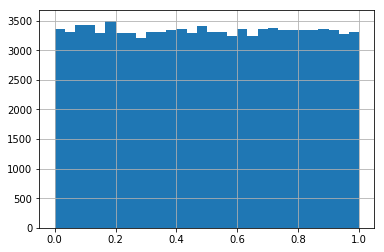

In [2]:
# Generamos una población alteatoria distribuida uniformemente:
N = 100_000
poblacion = pd.Series(np.random.random(size=N), name='valor')
# Para entender cómo se distribuyen los valos de esta población basta graficar un histograma:
poblacion.hist(bins=30)

In [3]:
# Así se calcula la media de una serie de Pandas:
poblacion.mean()

0.4991796828400024

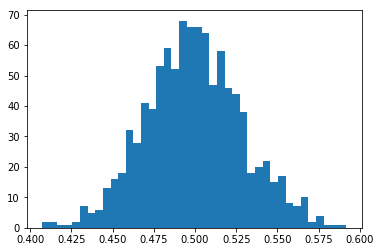

In [4]:
# Tomamos 1000 muestras de tamaño 100 de la población
muestras = [poblacion.sample(100) for i in range(1000)]

# A cada muestra le calculamos la media:
medias = [muestra.mean() for muestra in muestras]

# Graficamos la distribución de las medias de las muestras:
histograma = plt.hist(medias, bins=40)

Notamos que las medias muestrales se distribuyen al rededor de la media real.

Para usar la media hay que tener cuidado de los *valores atípicos*, ya que la media es muy sensible a ellos. Ejemplo:

In [5]:
salarios = [14_000, 20_000, 25_000, 35_000, 18_000]
np.mean(salarios)

22400.0

In [6]:
# Agregamos el salario de Bill Gates:
salarios.append(17_509_066_666)
np.mean(salarios)

2918196444.3333335

## La mediana, cuantiles, cuartiles y percentiles
La **mediana** es el valor que se encuentra justo a la mitad de nuestros datos cuando los ordenamos de menor a mayor. Si la cantidad de datos es par entonces tomamos el promedio entre los dos de la mitad.

In [45]:
salarios.sort()
salarios

[14000, 18000, 20000, 25000, 35000, 17509066666]

In [8]:
salarios[len(salarios)//2]

25000

In [9]:
# Numpy implementa un algoritmo eficiente que no
# ordena todo el arreglo:
np.median(salarios)  

22500.0

Más en general, el **estadístico de orden kº** es igual al $k$-ésimo valor más pequeño de una muestra; es decir, el que aparece en la posición $k$ ordenamos la muestra de menor a mayor.
Esto nos restringe $k$ a $1 \le k \le n$ para una muestra de tamaño $n$. Un concepto similar es el percentil, que es un número tal que 

## La moda

Es el valor más común. Sólo sirve con variables categóricas. Mejor sacar una tabla de frecuencias

In [10]:
colores = np.random.choice(['Rojo', 'Verde', 'Azul'], size=1000)

In [11]:
cuenta = {}
for color in colores:
    if color not in cuenta.keys():
        cuenta[color] = 1
    else:
        cuenta[color] += 1

In [12]:
cuenta

{'Verde': 349, 'Azul': 326, 'Rojo': 325}

In [13]:
cuenta = collections.Counter(colores)
cuenta

Counter({'Verde': 349, 'Azul': 326, 'Rojo': 325})

## Comparación de las tres medidas

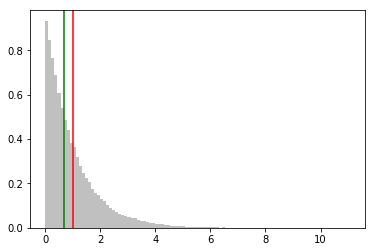

In [46]:
poblacion = np.random.exponential(size=100_000)
plt.hist(poblacion, bins=100, color='silver', density=True)
plt.axvline(np.mean(poblacion), color='red')
plt.axvline(np.median(poblacion), color='green')
#moda = collections.Counter(poblacion).most_common(1)[0][0]
#plt.axvline(moda, color='blue')

## Medidas de dispersión

La varianza de una muestra es el promedio de las distancias de los valores al rededor de la media... con algunos detallitos.

$$\sigma = \sqrt{\frac{ \sum_{i=1}^{n} (x_i - \bar{x})^2}{n}}$$

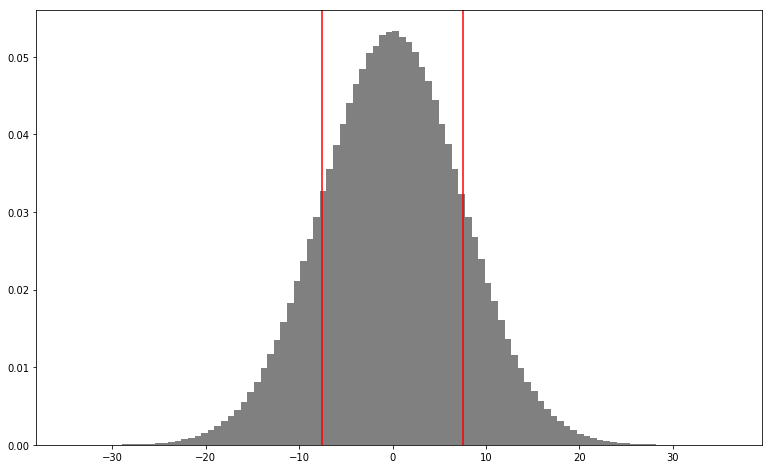

In [15]:
sigma = 7.5
poblacion = np.random.normal(0, sigma, size=1_000_000)
plt.figure(figsize=(13, 8))
plt.hist(poblacion, bins=100, color='gray', density=True)
plt.axvline(sigma, color='red')
plt.axvline(-sigma, color='red')
plt.show()

In [16]:
poblacion = pd.Series([1, 1, 1, 1, 1, 2, 3, 4, 5, 5, 5, 5, 5, 5])
muestra = pd.Series([1, 2, 3, 4, 5])

In [17]:
def desviacion_estandar(x):
    n = len(x)
    m = sum(x)/n
    return math.sqrt(sum((xi - m)**2 for xi in x)/n)

In [18]:
desviacion_estandar(poblacion)

1.8070158058105024

In [19]:
desviacion_estandar(muestra)

1.4142135623730951

In [20]:
def desviacion_estandar_muestra(x):
    n = len(x)
    m = sum(x)/n
    return (sum((xi - m)**2 for xi in x)/(n - 1))**(1/2)

In [21]:
desviacion_estandar_muestra(muestra)

1.5811388300841898

**Lección para llevar en el corazón:** Para describir una distribución, lo mínimo aceptable es describirla como $\mu \pm \sigma$.

## Correlación

In [47]:
tabla = pd.read_csv('Datos/eic2015_17_csv/TR_PERSONA17.CSV', encoding='latin1')
tabla.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-06,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [23]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368976 entries, 0 to 368975
Data columns (total 86 columns):
ID_VIV                368976 non-null int64
ID_PERSONA            368976 non-null int64
ENT                   368976 non-null int64
NOM_ENT               368976 non-null object
MUN                   368976 non-null int64
NOM_MUN               368976 non-null object
LOC50K                368976 non-null int64
NOM_LOC               368976 non-null object
COBERTURA             368976 non-null int64
ESTRATO               368976 non-null object
UPM                   368976 non-null int64
FACTOR                368976 non-null int64
NUMPER                368976 non-null int64
SEXO                  368976 non-null int64
EDAD                  368976 non-null int64
PARENT                368976 non-null int64
PARENT_OTRO_C         368976 non-null int64
IDENT_MADRE           368976 non-null int64
IDENT_PADRE           368976 non-null int64
SERSALUD              368976 non-null int64
AFROD

In [24]:
tabla = tabla[['EDAD', 'INGTRMEN', 'ESCOACUM']]
tabla.head()

,EDAD,INGTRMEN,ESCOACUM
0,30,10000.0,16.0
1,71,NaN,6.0
2,2,NaN,NaN
3,23,4286.0,9.0
4,24,4286.0,6.0


In [25]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368976 entries, 0 to 368975
Data columns (total 3 columns):
EDAD        368976 non-null int64
INGTRMEN    141399 non-null float64
ESCOACUM    350144 non-null float64
dtypes: float64(2), int64(1)
memory usage: 8.4 MB


In [26]:
tabla['ESCOACUM'].describe()

count    350144.000000
mean          7.789138
std           8.010872
min           0.000000
25%           3.000000
50%           8.000000
75%          10.000000
max          99.000000
Name: ESCOACUM, dtype: float64

In [27]:
tabla = tabla.dropna()  # Quitar todos los renglones que contengan valores nulos
tabla = tabla[
    (tabla['EDAD'] < 90)
    & (tabla['INGTRMEN'] < 500_000)
    & (tabla['ESCOACUM'] < 90)
]

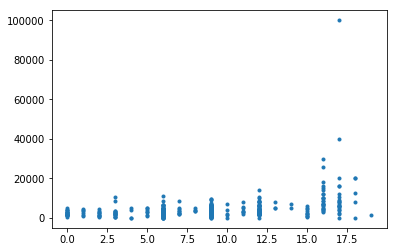

In [28]:
muestra = tabla.sample(400)
plt.plot(muestra['ESCOACUM'], muestra['INGTRMEN'], marker='.', linestyle='none')

- Covarianza: $$\mathrm{Cov}(x, y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x}) \, (y_i - \bar{y})}{n}$$
- Coeficiente de correlación de Pearson:
$$r = \frac{ \mathrm{Cov}(x, y) }{ \sigma_{x} \, \sigma_{y} }$$

In [29]:
def pearson(x, y):
    n = len(x)
    assert n == len(y)
    media_x = sum(x)/n
    media_y = sum(y)/n
    covarianza = sum((x[i] - media_x)*(y[i] - media_y) for i in range(n))/n
    desviacion_x = (sum((x[i] - media_x)**2  for i in range(n))/n)**.5
    desviacion_y = (sum((y[i] - media_y)**2  for i in range(n))/n)**.5
    return covarianza/(desviacion_x*desviacion_y)

In [30]:
x = list(tabla['INGTRMEN'])
y = list(tabla['ESCOACUM'])
pearson(x, y)

0.3255209087442133

In [31]:
tabla.columns

Index(['EDAD', 'INGTRMEN', 'ESCOACUM'], dtype='object')

In [32]:
tabla = pd.read_csv('Datos/eic2015_17_csv/TR_PERSONA17.CSV', encoding='latin1')

In [33]:
numericas = (tabla.dtypes == np.dtype('float64')) | (tabla.dtypes == np.dtype('int64'))
columnas_numericas = [key for (key, value) in numericas.to_dict().items() if value]
tabla_num = tabla[columnas_numericas]
tabla_num.head()

,ID_VIV,ID_PERSONA,ENT,MUN,LOC50K,COBERTURA,UPM,FACTOR,NUMPER,SEXO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,1,0,2,139186,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,1,0,2,139224,2,1,3,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,1,0,2,139169,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,1,0,2,139169,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,1,0,2,139169,2,2,3,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [34]:
# Porcentaje de NA por columna:
na_por_col = {columna: np.round(100*np.mean(tabla_num[columna].isnull())) for columna in tabla_num}
columnas_seleccionadas = [nombre
                          for (nombre, porcentaje) in na_por_col.items()
                          if porcentaje <= 10]
(tabla[columnas_seleccionadas].dropna()).corr()

,ID_VIV,ID_PERSONA,ENT,MUN,LOC50K,COBERTURA,UPM,FACTOR,NUMPER,SEXO,...,HLENGUA,ELENGUA,ASISTEN,ESCOLARI,NIVACAD,ALFABET,ESCOACUM,MUN_RES10,ENT_PAIS_RES10,TAMLOC
ID_VIV,1.000000,1.000000,NaN,1.000000,-0.303399,NaN,0.997366,-0.174642,0.007856,-0.001505,...,-0.011330,-0.003980,-0.002560,0.000217,-0.015657,-0.003506,-0.013477,0.053232,-0.008587,-0.205253
ID_PERSONA,1.000000,1.000000,NaN,1.000000,-0.303399,NaN,0.997366,-0.174642,0.007856,-0.001505,...,-0.011330,-0.003980,-0.002560,0.000217,-0.015657,-0.003506,-0.013477,0.053232,-0.008587,-0.205253
ENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUN,1.000000,1.000000,NaN,1.000000,-0.303403,NaN,0.997366,-0.174646,0.007856,-0.001505,...,-0.011330,-0.003979,-0.002560,0.000217,-0.015657,-0.003505,-0.013478,0.053232,-0.008587,-0.205257
LOC50K,-0.303399,-0.303399,NaN,-0.303403,1.000000,NaN,-0.310004,0.503505,-0.017978,0.006181,...,-0.001748,-0.006623,-0.001855,-0.001253,0.054588,-0.034017,0.063322,-0.020823,-0.006728,0.851371
COBERTURA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UPM,0.997366,0.997366,NaN,0.997366,-0.310004,NaN,1.000000,-0.178565,0.007261,-0.001697,...,-0.011945,-0.004568,-0.002738,-0.000183,-0.015782,-0.003341,-0.013466,0.053270,-0.008896,-0.218260
FACTOR,-0.174642,-0.174642,NaN,-0.174646,0.503505,NaN,-0.178565,1.000000,-0.016681,0.008338,...,0.004829,0.000654,0.004122,-0.001006,0.045577,-0.024972,0.052100,-0.003450,-0.002287,0.475255
NUMPER,0.007856,0.007856,NaN,0.007856,-0.017978,NaN,0.007261,-0.016681,1.000000,0.061884,...,0.011837,0.016628,-0.501076,-0.008035,-0.025688,0.088047,-0.085397,0.028412,0.042140,-0.012261
SEXO,-0.001505,-0.001505,NaN,-0.001505,0.006181,NaN,-0.001697,0.008338,0.061884,1.000000,...,0.001554,0.002381,0.024660,-0.001532,0.006802,0.011175,0.005695,-0.000704,0.000010,0.008952


In [35]:
df_nba = pd.read_csv('Datos/Biometricos/nba.csv')
df_nfl = pd.read_csv('Datos/Biometricos/nfl.csv')

In [36]:
df_nba = df_nba[['age', 'player_height', 'player_weight']]
df_nba.columns = ['edad', 'estatura', 'peso']
df_nba.head()

,edad,estatura,peso
0,23.0,195.58,90.71840
1,27.0,210.82,106.59412
2,30.0,208.28,106.59412
3,29.0,210.82,111.13004
4,22.0,205.74,106.59412


In [37]:
df_nfl = df_nfl[['Age', 'Height (inches)', 'Weight (lbs)']]
df_nfl.columns = ['edad', 'estatura', 'peso']
df_nfl['estatura'] = df_nfl['estatura']*2.54
df_nfl['peso'] = df_nfl['peso']*0.453592
df_nfl = df_nfl[df_nfl['edad'] < 80]
df_nfl.head()

,edad,estatura,peso
2,56.0,187.96,104.32616
3,30.0,185.42,115.66596
4,25.0,195.58,138.34556
7,22.0,195.58,113.39800
11,56.0,175.26,81.64656


In [38]:
df_nba.dropna(inplace=True)
df_nfl.dropna(inplace=True)

In [39]:
df_nba.corr()

,edad,estatura,peso
edad,1.000000,-0.016669,0.033497
estatura,-0.016669,1.000000,0.835145
peso,0.033497,0.835145,1.000000


In [40]:
df_nfl.corr()

,edad,estatura,peso
edad,1.000000,-0.021969,-0.200734
estatura,-0.021969,1.000000,0.699486
peso,-0.200734,0.699486,1.000000


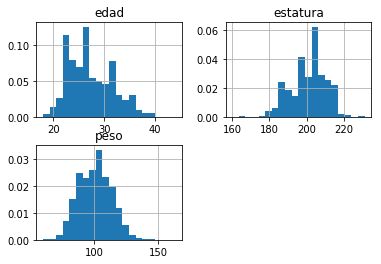

In [41]:
df_nba.hist(bins=20, density=True)
None

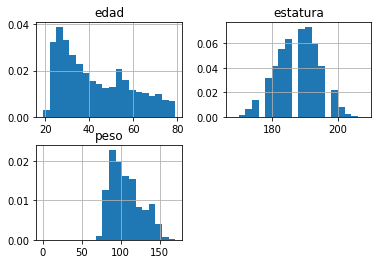

In [42]:
df_nfl.hist(bins=20, density=True)
None

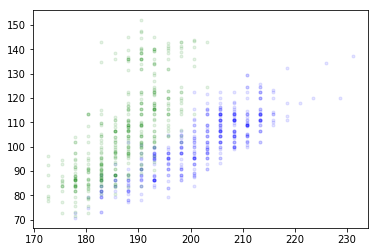

In [43]:
muestra_nba = df_nba.sample(400)
muestra_nfl = df_nfl.sample(400)
plt.plot(muestra_nba['estatura'], muestra_nba['peso'], '.', alpha=.1, color='blue')
plt.plot(muestra_nfl['estatura'], muestra_nfl['peso'], '.', alpha=.1, color='green')

Si $r$ es el coeficiente de correlación de Pearson, la $r^2$ (a veces escrita en mayúscula como $R^2$) es un valor entre 0 y 1 que nos indica el poder explicativo de una variable en términos de la otra.

In [44]:
0.835145**2

0.697467171025